In [43]:
from IPython.display import display
from task.dataset_loader import load_raw_dataset
from task.dataset_loader import load_cleaned_dataset
from task.data_visualization import plot_text_length_stats
from task.descriptive_analysis import get_text_length_stats
import matplotlib.pyplot as plt

from task.data_cleaning import (
     date_to_datetime,
     handle_missing_values, 
     standardize_text,
     handle_duplicates,
     save_processed_dataset
)

# silence warnings
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [57]:
raw_data = load_raw_dataset()
print("Data Type:")
print(raw_data['date'].dtype)
display(raw_data)

Data Type:
object


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


# Date to date time

In [53]:
processed_data = date_to_datetime(raw_data)
print("DataType:")
print(processed_data['date'].dtype)
display(processed_data)

DataType:
datetime64[ns]


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaT,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaT,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaT,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaT,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaT,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX


# Missing Value

In [5]:
processed_data = handle_missing_values(processed_data)
display(processed_data)

,Unnamed: 0,headline,url,publisher,date,stock
10,10,30 Stocks Moving in Friday's Pre-Market Session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,2020-05-22,A
11,11,SVB Leerink Maintains Outperform on Agilent Te...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,2020-05-22,A
12,12,8 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/05/16089803/8...,Tyree Gorges,2020-05-21,A
13,13,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,2020-05-21,A
14,14,Agilent Technologies Q2 Adj. EPS $0.71 Beats $...,https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,2020-05-21,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX


# Text standardization

In [6]:
processed_data = standardize_text(processed_data)
print(processed_data['date'].dtype)
display(processed_data)

datetime64[ns]


,Unnamed: 0,headline,url,publisher,date,stock
10,10,30 stocks moving fridays premarket session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,2020-05-22,A
11,11,svb leerink maintains outperform agilent techn...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,2020-05-22,A
12,12,8 stocks moving thursdays afterhours session,https://www.benzinga.com/news/20/05/16089803/8...,Tyree Gorges,2020-05-21,A
13,13,agilent technologies shares trading higher com...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,2020-05-21,A
14,14,agilent technologies q2 adj eps 071 beats 061 ...,https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,2020-05-21,A
...,...,...,...,...,...,...
1407323,1413844,top narrow based indexes august 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX
1407324,1413845,recap wednesdays top percentage gainers losers,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX
1407325,1413846,update oppenheimer color china zenix auto init...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX
1407326,1413847,oppenheimer initiates china zenix outperform 8 pt,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX


# Duplicate values

In [7]:
processed_data = handle_duplicates(processed_data)
print("DataType:")
print(processed_data['date'].dtype)
display(processed_data)

DataType:
datetime64[ns]


,Unnamed: 0,headline,url,publisher,date,stock
10,10,30 stocks moving fridays premarket session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,2020-05-22,A
11,11,svb leerink maintains outperform agilent techn...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,2020-05-22,A
12,12,8 stocks moving thursdays afterhours session,https://www.benzinga.com/news/20/05/16089803/8...,Tyree Gorges,2020-05-21,A
13,13,agilent technologies shares trading higher com...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,2020-05-21,A
14,14,agilent technologies q2 adj eps 071 beats 061 ...,https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,2020-05-21,A
...,...,...,...,...,...,...
1407323,1413844,top narrow based indexes august 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX
1407324,1413845,recap wednesdays top percentage gainers losers,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX
1407325,1413846,update oppenheimer color china zenix auto init...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX
1407326,1413847,oppenheimer initiates china zenix outperform 8 pt,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX


# Save Cleaned dataset

In [7]:
import os

output_folder = os.path.join('..', 'data') 
save_processed_dataset(processed_data, output_folder)

Cleaned dataset saved to ../data/cleaned_analyst_ratings_dataset.csv


'../data/cleaned_analyst_ratings_dataset.csv'

# EDA with the cleaned dataset

In [8]:
from IPython.display import display
import matplotlib.pyplot as plt

from task.dataset_loader import load_cleaned_dataset

from task.descriptive_analysis import (
     get_text_length_stats,
     count_articles_per_publisher,
     identify_unique_domains
)
from task.inferential_analysis import (
     analyze_publication_dates,

)
from task.data_visualization import (
     visualize_publication_dates,
     plot_text_length_stats,
     plot_publisher_counts,
     plot_domain_frequency,
     visualize_stock_prices
)
from task.sentimental_analysis import (
     perform_sentiment_analysis,
)
from task.stock_price_loader import (
     fetch_stock_prices

)


# silence warnings
import warnings
warnings.filterwarnings('ignore')

# Load Cleaned Dateset 

In [16]:
cleaned_data = load_cleaned_dataset()
display(cleaned_data)

,Unnamed: 0,headline,url,publisher,date,stock
0,10,30 stocks moving fridays premarket session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,2020-05-22,A
1,11,svb leerink maintains outperform agilent techn...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,2020-05-22,A
2,12,8 stocks moving thursdays afterhours session,https://www.benzinga.com/news/20/05/16089803/8...,Tyree Gorges,2020-05-21,A
3,13,agilent technologies shares trading higher com...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,2020-05-21,A
4,14,agilent technologies q2 adj eps 071 beats 061 ...,https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,2020-05-21,A
...,...,...,...,...,...,...
1351336,1413844,top narrow based indexes august 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX
1351337,1413845,recap wednesdays top percentage gainers losers,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX
1351338,1413846,update oppenheimer color china zenix auto init...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX
1351339,1413847,oppenheimer initiates china zenix outperform 8 pt,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX


In [18]:
cleaned_data = load_cleaned_dataset()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351341 entries, 0 to 1351340
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1351341 non-null  int64 
 1   headline    1351339 non-null  object
 2   url         1351341 non-null  object
 3   publisher   1351341 non-null  object
 4   date        1351341 non-null  object
 5   stock       1351341 non-null  object
dtypes: int64(1), object(5)
memory usage: 61.9+ MB


# Descriptive Statistics

In [23]:
# Load the dataset
df = load_cleaned_dataset()

# Calculate headline lengths
df['headline_length'] = df['headline'].str.len()
print(df['headline_length'].describe())

count    1.351339e+06
mean     6.192729e+01
std      3.238855e+01
min      2.000000e+00
25%      4.000000e+01
50%      5.500000e+01
75%      7.500000e+01
max      4.290000e+02
Name: headline_length, dtype: float64


In [24]:
print(df['publisher'].value_counts())

publisher
Paul Quintaro        224161
Lisa Levin           174571
Benzinga Newsdesk    135734
Charles Gross         94942
Monica Gerson         81769
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1029, dtype: int64


# Plot Text length Statistics

In [41]:
plot_text_length_stats(stats)

NameError: name 'stats' is not defined

# Number of Articles (Publisher)

In [12]:
publisher_counts = count_articles_per_publisher(cleaned_data)
display(publisher_counts)

publisher
Paul Quintaro        224161
Lisa Levin           174571
Benzinga Newsdesk    135734
Charles Gross         94942
Monica Gerson         81769
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1029, dtype: int64

# Plot number of articles per publisher

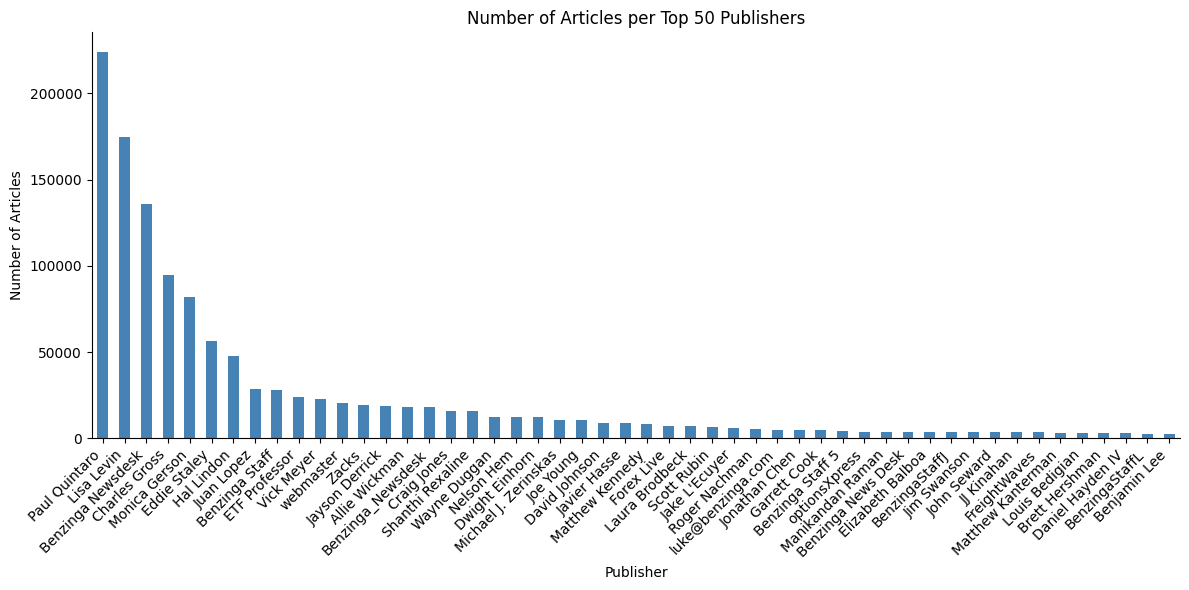

In [13]:
plot_publisher_counts(publisher_counts)

# Unique Domains

In [14]:
unique_domains = identify_unique_domains(cleaned_data)
# Print the results
print("Unique Domains:")
display(unique_domains)

Unique Domains:


array(['', 'benzinga', 'gmail', 'andyswan', 'investdiva', 'eosdetroit',
       'tothetick', 'forextraininggroup', 'stockmetrix'], dtype=object)

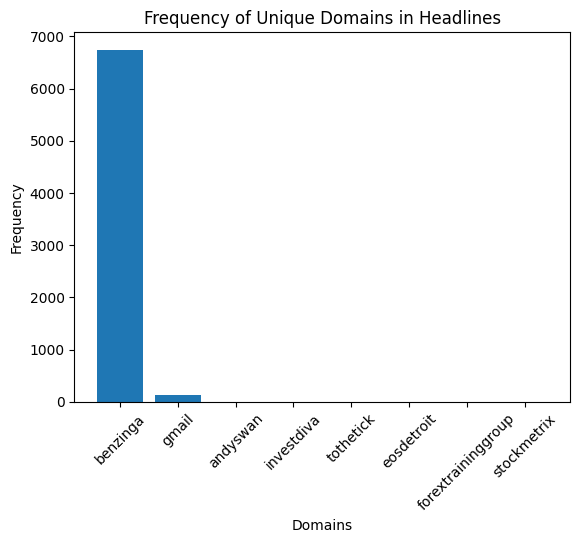

In [15]:
plot_domain_frequency(cleaned_data)

# Analyzing the Publication Date

In [16]:
news_frequency, news_frequency_monthly = analyze_publication_dates(cleaned_data)

News Frequency by Day of the Week:
day
0    254841
1    285468
2    289049
3    289906
4    208511
5      7486
6     16078
Name: headline, dtype: int64
News Frequency by Month and Year:
year  month
2009  2            1
      4            3
      5           12
      6           40
      7           75
               ...  
2020  2        16523
      3        20314
      4        16141
      5         8659
      6          457
Name: headline, Length: 136, dtype: int64


# Plot Publicattion Date

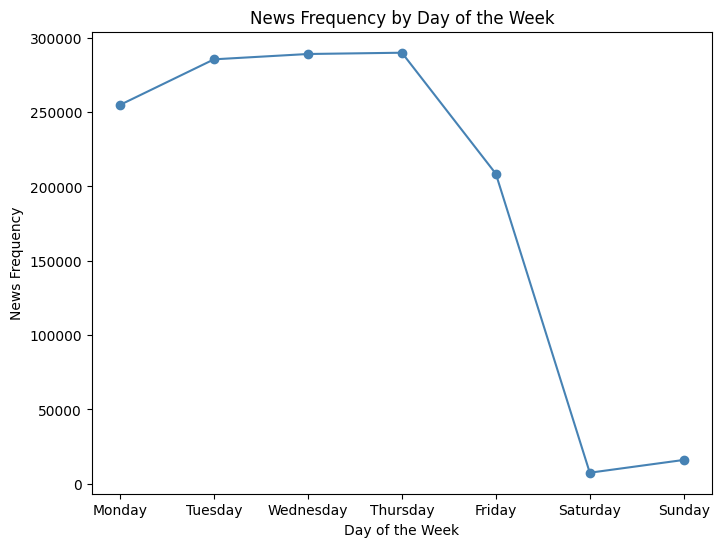

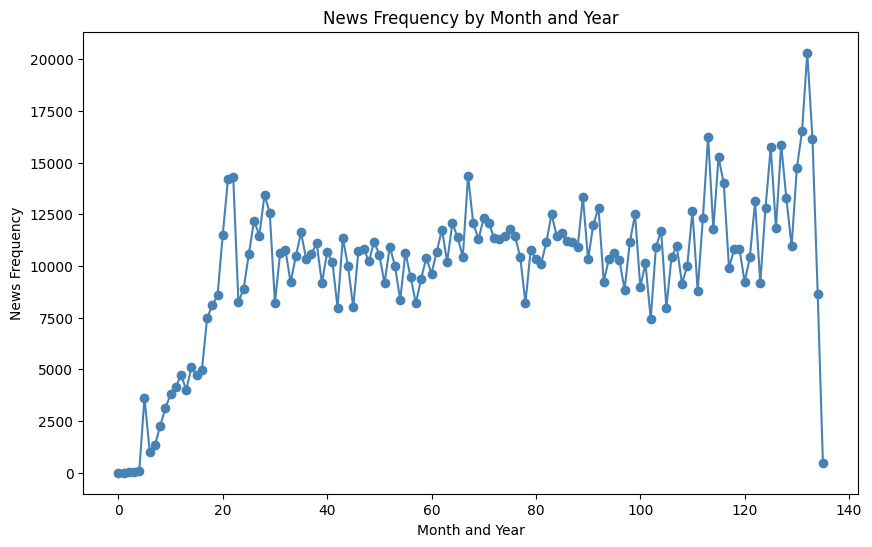

In [17]:
visualize_publication_dates(news_frequency, news_frequency_monthly)

# Time Series Analysis

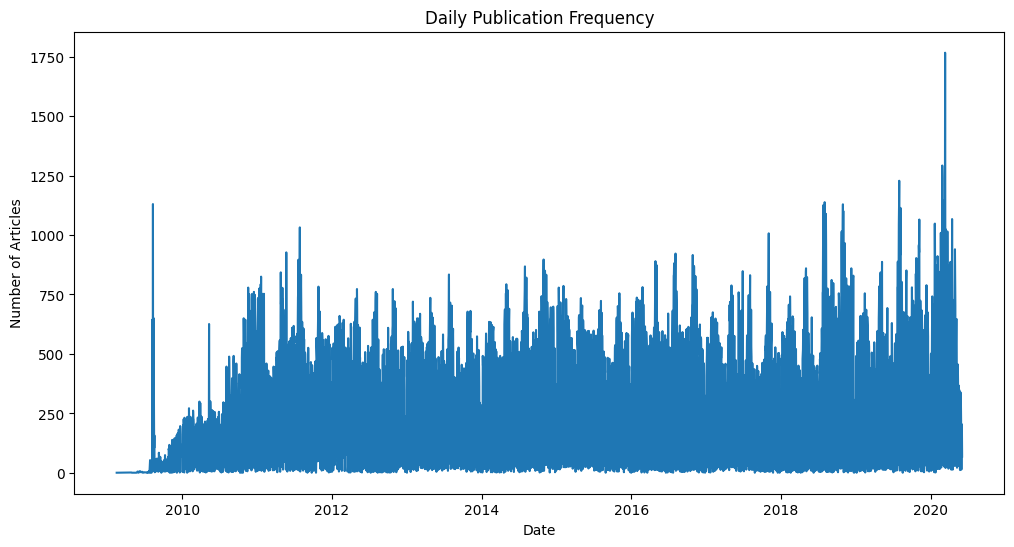

In [58]:
# Convert the 'date' column to datetime if not already done
df = date_to_datetime(raw_data)

# Group by date and count the number of articles
daily_publication_count = df.groupby(df['date'].dt.date).size()

# Plot the publication frequency over time
daily_publication_count.plot(kind='line', figsize=(12, 6), title='Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

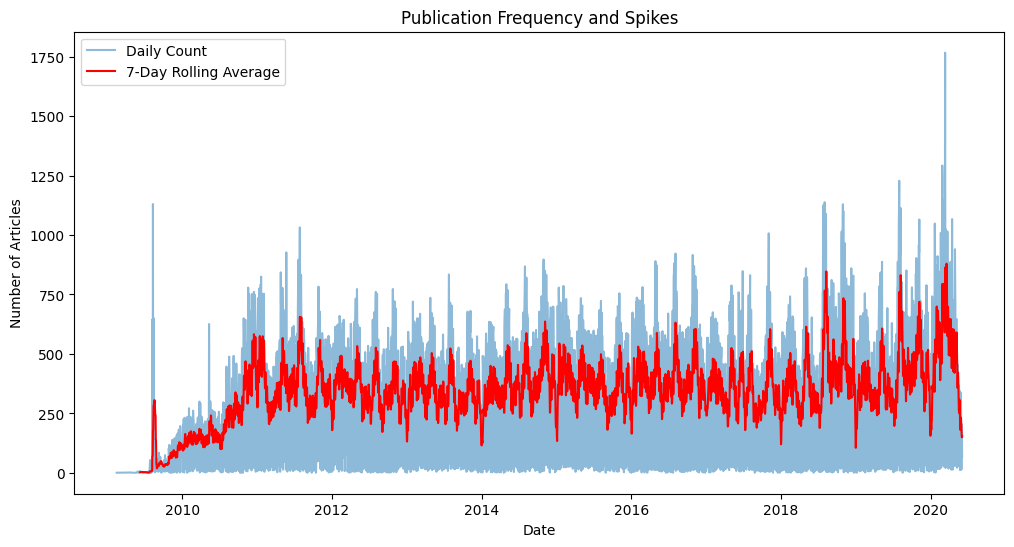

In [61]:
# Use rolling mean to smooth out the trend and identify spikes
daily_publication_count_rolling = daily_publication_count.rolling(window=11).mean()

# Plot the smoothed time series
plt.figure(figsize=(12, 6))
plt.plot(daily_publication_count, label='Daily Count', alpha=0.5)
plt.plot(daily_publication_count_rolling, label='7-Day Rolling Average', color='red')
plt.title('Publication Frequency and Spikes')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

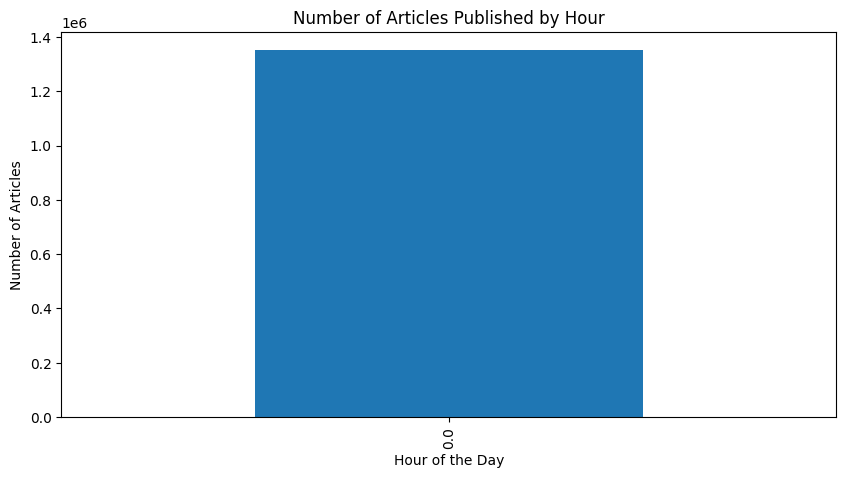

In [60]:
# Extract the hour from the datetime
df['hour'] = df['date'].dt.hour

# Group by hour and count the number of articles
hourly_publication_count = df.groupby('hour').size()

# Plot the distribution of articles by hour
plt.figure(figsize=(10, 5))
hourly_publication_count.plot(kind='bar', title='Number of Articles Published by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.show()

# Sentimental Analysis

In [18]:
sentiment_scores = perform_sentiment_analysis(cleaned_data)
display(sentiment_scores)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/neba/nltk_data...


,Unnamed: 0,headline,url,publisher,date,stock,domain,year,month,day,sentiment_score
0,10,30 stocks moving fridays premarket session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,2020-05-22,A,,2020,5,4,0.0000
1,11,svb leerink maintains outperform agilent techn...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,2020-05-22,A,benzinga,2020,5,4,0.0000
2,12,8 stocks moving thursdays afterhours session,https://www.benzinga.com/news/20/05/16089803/8...,Tyree Gorges,2020-05-21,A,,2020,5,3,0.0000
3,13,agilent technologies shares trading higher com...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,2020-05-21,A,,2020,5,3,0.2960
4,14,agilent technologies q2 adj eps 071 beats 061 ...,https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,2020-05-21,A,,2020,5,3,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
1351336,1413844,top narrow based indexes august 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX,,2011,8,0,0.2023
1351337,1413845,recap wednesdays top percentage gainers losers,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX,,2011,6,2,-0.3818
1351338,1413846,update oppenheimer color china zenix auto init...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX,,2011,6,1,0.0000
1351339,1413847,oppenheimer initiates china zenix outperform 8 pt,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX,,2011,6,1,0.0000


# Fetching Stock Price & Applying Analysis Indicators with TA-Lib

In [19]:
TICKER = "TSLA"
stock_data = fetch_stock_prices(TICKER)
display(stock_data)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-26 00:00:00-04:00,218.750000,219.089996,211.009995,213.210007,59301200,0.0,0.0
2024-08-27 00:00:00-04:00,213.250000,215.660004,206.940002,209.210007,62821400,0.0,0.0
2024-08-28 00:00:00-04:00,209.720001,211.839996,202.589996,205.750000,64116400,0.0,0.0


# Visualizing Stock Price Dataset

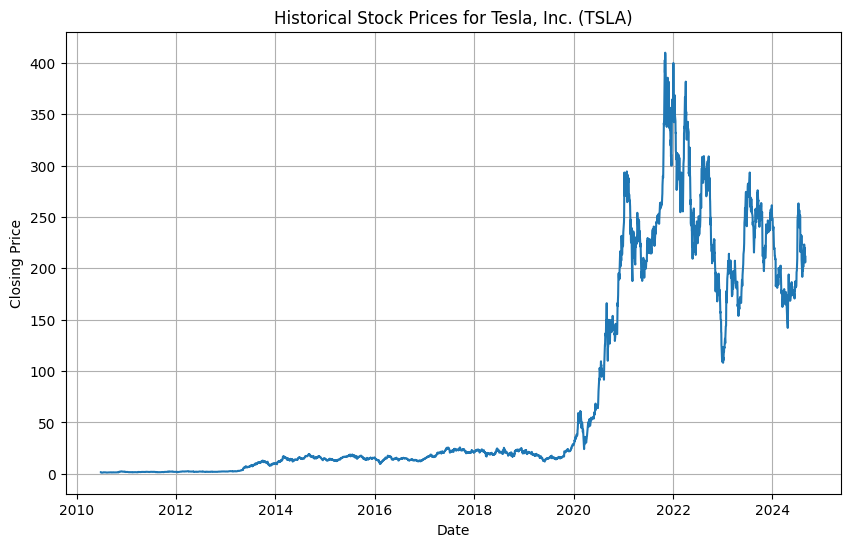

In [20]:
visualize_stock_prices(stock_data, TICKER )